In [1]:
import os

import pandas as pd

In [2]:
data_path = os.path.join('..', 'data', 'raw')

In [3]:
df_taxi_owners = pd.read_pickle(os.path.join(data_path, 'taxi_owners.p'))
df_taxi_vehicles = pd.read_pickle(os.path.join(data_path, 'taxi_vehicles.p'))

In [5]:
import magic
magic.from_file('../data/raw/taxi_owners.p')


'data'

In [6]:
f = magic.Magic(mime=True)
f.from_file('../data/raw/taxi_owners.p')

'application/octet-stream'

In [16]:
f = magic.Magic(mime=True)
f.from_file('../data/interim/db.sqlite')

'application/vnd.sqlite3'

In [7]:
f = magic.Magic(mime=True)
f.from_file('../data/interim/small_data.xlsx')

'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'

In [8]:
magic.from_file('../data/interim/small_data.xlsx')

'Microsoft Excel 2007+'

In [9]:
magic.from_file('../data/interim/db.sqlite')

'SQLite 3.x database, last written using SQLite version 3047001, file counter 3, database pages 6, cookie 0x2, schema 4, UTF-8, version-valid-for 3'

In [10]:
magic.from_file('../reports/figures/tate_work_check.jpg')

'JPEG image data, JFIF standard 1.01, resolution (DPI), density 100x100, segment length 16, baseline, precision 8, 1200x800, components 3'

In [11]:
magic.from_file('../reports/figures/tate_work_check.svg')

'SVG Scalable Vector Graphics image'

In [12]:
df_taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [13]:
df_taxi_vehicles.columns

Index(['vid', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')

In [14]:
df_taxi_owners.columns

Index(['rid', 'vid', 'owner', 'address', 'zip'], dtype='object')

In [32]:
df_taxi_owners['vid']

0       6285
1       4862
2       1495
3       4231
4       5971
        ... 
3514    4453
3515     121
3516    3465
3517    1962
3518    1031
Name: vid, Length: 3519, dtype: object

In [15]:
df_taxi_own_veh = df_taxi_owners.merge(df_taxi_vehicles, on='vid')

In [16]:
df_taxi_own_veh

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.
...,...,...,...,...,...,...,...,...,...,...
3514,T4453,4453,IMAGIN CAB CORP,3351 W. ADDISON ST.,60618,FORD,ESCAPE,2010,HYBRID,IMAGIN CAB CORP
3515,T121,121,TRIBECA CAB CORP,4536 N. ELSTON AVE.,60630,FORD,C-MAX,2014,HYBRID,TRIBECA CAB CORP
3516,T3465,3465,AMIR EXPRESS INC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2014,HYBRID,AMIR EXPRESS INC
3517,T1962,1962,KARY CAB COMPANY,4707 N. KENTON AVE.,60630,TOYOTA,CAMRY,2014,HYBRID,KARY CAB COMPANY


In [17]:
df_taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


### Suffixes

In [18]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', suffixes=['_owners', '_vehicles']).head()

,rid,vid,owner_owners,address,zip,make,model,year,fuel_type,owner_vehicles
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


### Indicator

In [19]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', indicator=True).head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y,_merge
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC,both
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.,both
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC.",both
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.,both
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.,both


In [20]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', indicator=True)['_merge'].value_counts()

_merge
both          3519
left_only        0
right_only       0
Name: count, dtype: int64

### Validate

In [21]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', validate='one_to_one').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [22]:
df_taxi_owners_sample = df_taxi_owners.sample(frac=.8)
df_taxi_owners_duplicated = pd.concat([df_taxi_owners, df_taxi_owners_sample], ignore_index=True)

In [50]:
df_taxi_owners_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rid      6334 non-null   object
 1   vid      6334 non-null   object
 2   owner    6334 non-null   object
 3   address  6334 non-null   object
 4   zip      6334 non-null   object
dtypes: object(5)
memory usage: 247.6+ KB


In [23]:
df_taxi_owners_duplicated.merge(df_taxi_vehicles, on='vid', validate='one_to_one').head()

MergeError: Merge keys are not unique in left dataset; not a one-to-one merge

In [24]:
df_taxi_owners_duplicated.merge(df_taxi_vehicles, on='vid', validate='many_to_one').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [25]:
df_taxi_owners_duplicated.merge(df_taxi_vehicles, on='vid', validate='many_to_one')['vid'].value_counts()

vid
1962    2
6285    2
121     2
1495    2
4231    2
       ..
742     1
2658    1
5694    1
227     1
2164    1
Name: count, Length: 3519, dtype: int64

### ignore_index

In [26]:
df_5 = df_taxi_owners.head(5)
df_15 = df_taxi_owners.iloc[15:21]

In [27]:
df_5

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [28]:
df_15

,rid,vid,owner,address,zip
15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618
20,T799,799,ALAM ENT INC.,5501 N. MELVINA AVE.,60630


In [29]:
pd.concat([df_5, df_15], ignore_index=False)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618
15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


In [30]:
pd.concat([df_5, df_15], ignore_index=True)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618
5,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
6,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
7,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
8,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
9,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


In [31]:
pd.concat([df_5, df_15], ignore_index=False).reset_index(drop=False)

,index,rid,vid,owner,address,zip
0,0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618
5,15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
6,16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
7,17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
8,18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
9,19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


### left_on, right_on

In [32]:
df_taxi_vehicles_renamed = df_taxi_vehicles.rename(mapper={
    'vid': 'vid_pro',

},
    axis=1

)

In [33]:
df_taxi_vehicles_renamed.columns

Index(['vid_pro', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')

In [34]:
df_taxi_owners_duplicated.merge(df_taxi_vehicles_renamed, left_on='vid', right_on='vid_pro')

,rid,vid,owner_x,address,zip,vid_pro,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,6285,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,4862,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,1495,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,4231,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,5971,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.
...,...,...,...,...,...,...,...,...,...,...,...
6329,T2889,2889,FIRST CHOICE TAXI LLC,4720 S. WOODLAWN AVE.,60615,2889,TOYOTA,SIENNA,2020,GASOLINE,FIRST CHOICE TAXI LLC
6330,T2597,2597,RIDEWAY CAB CO,4020 W. GLENLAKE AVE.,60646,2597,TOYOTA,PRIUS,2013,HYBRID,RIDEWAY CAB CO
6331,T6520,6520,S K OHAMS LLC,2532 W. WARREN BLVD.,60612,6520,TOYOTA,SIENNA,2020,GASOLINE,S K OHAMS LLC
6332,T5098,5098,KHANGURA CAB CORP,4626 W. CORNELIA AVE.,60641,5098,TOYOTA,CAMRY,2016,HYBRID,KHANGURA CAB CORP


### how

In [43]:
df_taxi_owners_mod = df_taxi_owners.copy()

In [38]:
df_taxi_owners_mod['vid'] = df_taxi_owners_mod['vid'].sample(frac=.3)

In [42]:
df_taxi_owners_mod['vid'].isna().sum()

np.int64(2463)

In [54]:
def calc_new_vid(row):
    print(row.vid)
    return row

In [55]:
df_taxi_owners_mod.iloc[:5].apply(calc_new_vid, axis=1)

62853
4862
1495
4231
5971


,rid,vid,owner,address,zip
0,T6285,62853,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [50]:
from random import randint

df_taxi_owners_mod['vid'] = df_taxi_owners_mod.apply(lambda row: row['vid'] + str(randint(0, 10)) if randint(0, 1) else row['vid'], axis=1)

In [56]:
df_taxi_owners_mod['vid'].isna().sum()

np.int64(0)

In [65]:
df_taxi_owners_mod['vid'].notnull().sum()

np.int64(3519)

In [60]:
df_taxi_vehicles.isna().sum()

vid          0
make         0
model        0
year         0
fuel_type    0
owner        0
dtype: int64

In [58]:
# inner - vid w obu df musi miec dopasowanie
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid').shape

(1924, 10)

In [66]:
# left - wszystkie lewe + dopasowanie
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='left').shape

(3519, 10)

In [67]:
# right - wszystkie prawe
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='right').shape

(3564, 10)

In [68]:
# outer wszystkie lewe i wszytskie prawe
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='outer').shape

(5159, 10)

In [72]:
df_crews = pd.read_pickle(os.path.join(data_path, 'crews.p'))

In [78]:
df_crews.shape

(42502, 4)

In [73]:
df_crews.columns

Index(['id', 'department', 'job', 'name'], dtype='object')

In [74]:
df_crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [76]:
df_crews_self = df_crews.merge(df_crews, on='id', how='inner', suffixes=('_dir', '_crew'))

In [77]:
df_crews_self

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
...,...,...,...,...,...,...,...
834189,25975,Directing,Director,Jon Gunn,Directing,Director,Brett Winn
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
834191,25975,Directing,Director,Brett Winn,Directing,Director,Brian Herzlinger
834192,25975,Directing,Director,Brett Winn,Directing,Director,Jon Gunn


In [80]:
df_crews_self.shape

(834194, 7)

In [81]:
df_crews_self['id'].unique()

array([ 19995,    285, 206647, ..., 231617, 126186,  25975], shape=(4775,))

In [82]:
df_crews_self[(df_crews_self['job_dir'] == 'Director') & (df_crews_self['job_crew'] != 'Director')]

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


### Concat

In [3]:
df_gdp = pd.read_csv(os.path.join(data_path, 'WorldBank_GDP.csv'))
df_pop = pd.read_csv(os.path.join(data_path, 'WorldBank_POP.csv'))

In [4]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'GDP'], dtype='object')

In [5]:
df_pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'Pop'], dtype='object')

In [6]:
df_pop['Country Code'].value_counts()

Country Code
ZWE    10
ABW    10
AFG    10
AGO    10
ALB    10
       ..
AUT    10
AUS    10
ATG    10
ASM    10
ARM    10
Name: count, Length: 264, dtype: int64

In [7]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0
1,Afghanistan,AFG,"Population, total",2010,29185507.0
2,Angola,AGO,"Population, total",2010,23356246.0
3,Albania,ALB,"Population, total",2010,2913021.0
4,Andorra,AND,"Population, total",2010,84449.0


In [8]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [23]:
df_gp = pd.concat([df_pop, df_gdp], axis=0)

In [24]:
df_gp

,Country Name,Country Code,Indicator Name,Year,Pop,GDP
0,Aruba,ABW,"Population, total",2010,101669.0,NaN
1,Afghanistan,AFG,"Population, total",2010,29185507.0,NaN
2,Angola,AGO,"Population, total",2010,23356246.0,NaN
3,Albania,ALB,"Population, total",2010,2913021.0,NaN
4,Andorra,AND,"Population, total",2010,84449.0,NaN
...,...,...,...,...,...,...
35,United States,USA,GDP (current US$),2017,NaN,1.948540e+13
36,China,CHN,GDP (current US$),2018,NaN,1.360820e+13
37,Germany,DEU,GDP (current US$),2018,NaN,3.996760e+12
38,Japan,JPN,GDP (current US$),2018,NaN,4.970920e+12


In [29]:
df_gp[df_gp['Country Name'] == 'Arab World']

,Country Name,Country Code,Indicator Name,Year,Pop,GDP
5,Arab World,ARB,"Population, total",2010,354890042.0,NaN
269,Arab World,ARB,"Population, total",2011,363158703.0,NaN
533,Arab World,ARB,"Population, total",2012,371443547.0,NaN
797,Arab World,ARB,"Population, total",2012,371443547.0,NaN
1061,Arab World,ARB,"Population, total",2013,379705719.0,NaN
1325,Arab World,ARB,"Population, total",2014,387907748.0,NaN
1589,Arab World,ARB,"Population, total",2015,396028278.0,NaN
1853,Arab World,ARB,"Population, total",2016,404024433.0,NaN
2117,Arab World,ARB,"Population, total",2017,411898965.0,NaN
2381,Arab World,ARB,"Population, total",2018,419790588.0,NaN


In [30]:
df_sp500 = pd.read_csv(os.path.join(data_path, 'S&P500.csv'))

In [31]:
df_sp500.columns

Index(['Date', 'Returns'], dtype='object')

In [32]:
df_sp500.head()

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [33]:
pd.merge(df_gdp, df_sp500, left_on='Year', right_on="Date", how='left')

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010.0,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010.0,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010.0,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010.0,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011.0,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011.0,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011.0,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011.0,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012.0,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012.0,13.41


In [36]:
pd.merge_ordered(df_gdp, df_sp500, left_on='Year', right_on="Date", how='left').isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Year              0
GDP               0
Date              4
Returns           4
dtype: int64

In [37]:
gdp_sp500 = pd.merge_ordered(df_gdp, df_sp500, left_on='Year', right_on="Date", how='left', fill_method='ffill')

In [38]:
gdp_returns = gdp_sp500[['GDP', 'Returns']]

### merge_asof

In [39]:
from io import StringIO

In [73]:
jpm_io =StringIO("""
            date_time   close
0  2017-11-17 15:35:17  98.120
1  2017-11-17 15:40:04  98.180
2  2017-11-17 15:45:01  97.731
3  2017-11-17 15:50:55  97.740
4  2017-11-17 15:55:00  97.815
5  2017-11-17 16:00:30  98.020
6  2017-11-17 16:05:07  97.800
7  2017-11-17 16:10:08  97.840
8  2017-11-17 16:15:11  97.710
9  2017-11-17 16:20:29  97.760
10 2017-11-17 16:25:25  97.820
11 2017-11-17 16:30:53  97.950
12 2017-11-17 16:35:11  97.990
13 2017-11-17 16:40:44  98.060
14 2017-11-17 16:45:52  98.050
15 2017-11-17 16:50:37  98.110
16 2017-11-17 16:55:02  98.180
""".strip())

In [53]:
wells_io = StringIO("""
date_time   close
0  2017-11-17 15:35:08  54.323
1  2017-11-17 15:40:00  54.320
2  2017-11-17 15:45:32  54.190
3  2017-11-17 15:50:07  54.170
4  2017-11-17 15:55:00  54.184
5  2017-11-17 16:00:30  54.265
6  2017-11-17 16:05:52  54.200
7  2017-11-17 16:10:22  54.155
8  2017-11-17 16:15:43  54.190
9  2017-11-17 16:20:07  54.205
10 2017-11-17 16:25:13  54.230
11 2017-11-17 16:30:04  54.220
12 2017-11-17 16:35:32  54.220
13 2017-11-17 16:40:09  54.280
14 2017-11-17 16:45:24  54.240
15 2017-11-17 16:50:28  54.170
16 2017-11-17 16:55:42  54.180
""".strip())

In [74]:
jpm = pd.read_csv(jpm_io, skiprows=1,names=['date', 'time', 'close'], sep=r'\s+')

In [77]:
jpm['date_time'] = pd.to_datetime(jpm['date'] + ' ' + jpm['time'])

In [80]:
jpm.drop(columns=['date', 'time'], inplace=True)

In [82]:
jpm = jpm[['date_time', 'close']]

In [83]:
jpm

,date_time,close
0,2017-11-17 15:35:17,98.120
1,2017-11-17 15:40:04,98.180
2,2017-11-17 15:45:01,97.731
3,2017-11-17 15:50:55,97.740
4,2017-11-17 15:55:00,97.815
5,2017-11-17 16:00:30,98.020
6,2017-11-17 16:05:07,97.800
7,2017-11-17 16:10:08,97.840
8,2017-11-17 16:15:11,97.710
9,2017-11-17 16:20:29,97.760


In [84]:
wells = pd.read_csv(wells_io, skiprows=1,names=['date', 'time', 'close'], sep=r'\s+')
wells['date_time'] = pd.to_datetime(wells['date'] + ' ' + wells['time'])
wells.drop(columns=['date', 'time'], inplace=True)
wells = wells[['date_time', 'close']]


In [85]:
wells.head()

,date_time,close
0,2017-11-17 15:35:08,54.323
1,2017-11-17 15:40:00,54.320
2,2017-11-17 15:45:32,54.190
3,2017-11-17 15:50:07,54.170
4,2017-11-17 15:55:00,54.184


In [93]:
wells['close'].unique()

array([54.323, 54.32 , 54.19 , 54.17 , 54.184, 54.265, 54.2  , 54.155,
       54.205, 54.23 , 54.22 , 54.28 , 54.24 , 54.18 ])

In [94]:
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'),direction='nearest')

In [95]:
jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:17,98.120,54.323
1,2017-11-17 15:40:04,98.180,54.320
2,2017-11-17 15:45:01,97.731,54.190
3,2017-11-17 15:50:55,97.740,54.170
4,2017-11-17 15:55:00,97.815,54.184
5,2017-11-17 16:00:30,98.020,54.265
6,2017-11-17 16:05:07,97.800,54.200
7,2017-11-17 16:10:08,97.840,54.155
8,2017-11-17 16:15:11,97.710,54.190
9,2017-11-17 16:20:29,97.760,54.205


In [97]:
bac_io = StringIO("""
date_time   close
0  2017-11-17 15:35:17  26.552
1  2017-11-17 15:40:06  26.552
2  2017-11-17 15:45:05  26.388
3  2017-11-17 15:50:34  26.378
4  2017-11-17 15:55:06  26.383
5  2017-11-17 16:00:18  26.452
6  2017-11-17 16:05:20  26.373
7  2017-11-17 16:10:05  26.388
8  2017-11-17 16:15:07  26.369
9  2017-11-17 16:20:29  26.388
10 2017-11-17 16:25:00  26.467
11 2017-11-17 16:30:18  26.482
12 2017-11-17 16:35:08  26.492
13 2017-11-17 16:40:46  26.527
14 2017-11-17 16:45:55  26.522
15 2017-11-17 16:50:05  26.547
16 2017-11-17 16:55:02  26.567
""".strip())

bac = pd.read_csv(bac_io, skiprows=1,names=['date', 'time', 'close'], sep=r'\s+')
bac['date_time'] = pd.to_datetime(bac['date'] + ' ' + bac['time'])
bac.drop(columns=['date', 'time'], inplace=True)
bac = bac[['date_time', 'close']]


In [98]:
bac.head()

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383


In [99]:
jpm_wells_back = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'),direction='nearest')

In [100]:
jpm_wells_back

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:17,98.120,54.323,26.552
1,2017-11-17 15:40:04,98.180,54.320,26.552
2,2017-11-17 15:45:01,97.731,54.190,26.388
3,2017-11-17 15:50:55,97.740,54.170,26.378
4,2017-11-17 15:55:00,97.815,54.184,26.383
5,2017-11-17 16:00:30,98.020,54.265,26.452
6,2017-11-17 16:05:07,97.800,54.200,26.373
7,2017-11-17 16:10:08,97.840,54.155,26.388
8,2017-11-17 16:15:11,97.710,54.190,26.369
9,2017-11-17 16:20:29,97.760,54.205,26.388


In [102]:
price_diff = jpm_wells_back.diff()

In [103]:
price_diff

,date_time,close_jpm,close_wells,close_bac
0,NaT,NaN,NaN,NaN
1,0 days 00:04:47,0.060,-0.003,0.000
2,0 days 00:04:57,-0.449,-0.130,-0.164
3,0 days 00:05:54,0.009,-0.020,-0.010
4,0 days 00:04:05,0.075,0.014,0.005
5,0 days 00:05:30,0.205,0.081,0.069
6,0 days 00:04:37,-0.220,-0.065,-0.079
7,0 days 00:05:01,0.040,-0.045,0.015
8,0 days 00:05:03,-0.130,0.035,-0.019
9,0 days 00:05:18,0.050,0.015,0.019


In [104]:
import matplotlib.pyplot as plt

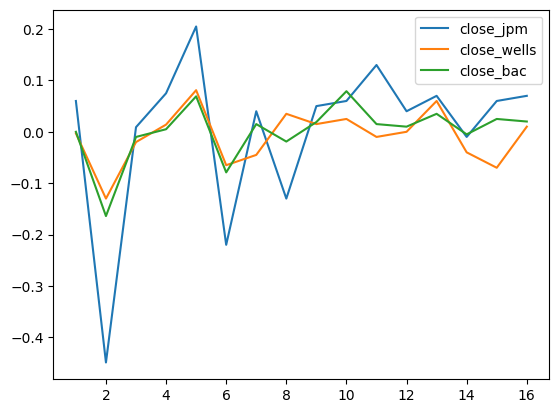

In [106]:
price_diff.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

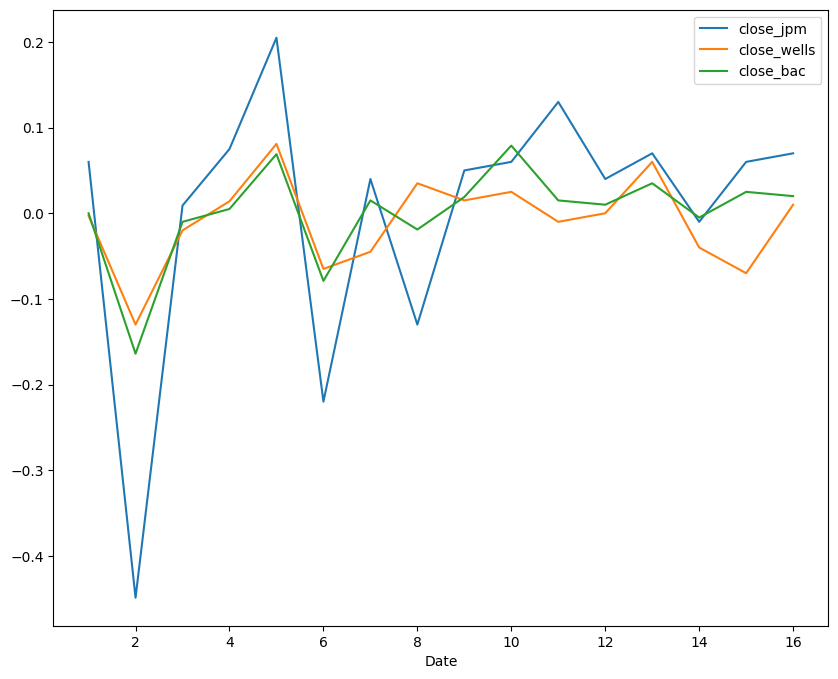

In [108]:
fig, ax = plt.subplots(figsize=(10, 8))

price_diff.plot(y=['close_jpm', 'close_wells', 'close_bac'], ax=ax)

ax.set_xlabel('Date')

plt.show()